In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+',
                       names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE","DIS", 
                                             "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])
housing.shape

(506, 14)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [7]:
def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = KNeighborsRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [10]:
print("{:24} {}".format("CRIM: ", calculate_r_2_for_feature(housing,'CRIM')))
print("{:24} {}".format("ZN: ", calculate_r_2_for_feature(housing,'ZN')))
print("{:24} {}".format("INDUS: ", calculate_r_2_for_feature(housing,'INDUS')))
print("{:24} {}".format("CHAS: ", calculate_r_2_for_feature(housing,'CHAS')))
print("{:24} {}".format("NOX: ", calculate_r_2_for_feature(housing,'NOX')))
print("{:24} {}".format("RM: ", calculate_r_2_for_feature(housing,'RM')))
print("{:24} {}".format("AGE: ", calculate_r_2_for_feature(housing,'AGE')))
print("{:24} {}".format("DIS: ", calculate_r_2_for_feature(housing,'DIS')))
print("{:24} {}".format("RAD: ", calculate_r_2_for_feature(housing,'RAD')))
print("{:24} {}".format("TAX: ", calculate_r_2_for_feature(housing,'TAX')))
print("{:24} {}".format("PTRATIO: ", calculate_r_2_for_feature(housing,'PTRATIO')))
print("{:24} {}".format("B: ", calculate_r_2_for_feature(housing,'B')))
print("{:24} {}".format("LSTAT: ", calculate_r_2_for_feature(housing,'LSTAT')))
print("{:24} {}".format("MEDV: ", calculate_r_2_for_feature(housing,'MEDV')))

CRIM:                    0.5164969634213692
ZN:                      0.39572019747048537
INDUS:                   0.8010866669384705
CHAS:                    0.11028248587570577
NOX:                     0.7884420872560394
RM:                      0.44856355678880433
AGE:                     0.5973138531641615
DIS:                     0.7973717009432739
RAD:                     0.9492510068036345
TAX:                     0.8811637541217752
PTRATIO:                 0.7456199220580169
B:                       0.3544794787362737
LSTAT:                   0.49598501262308897
MEDV:                    0.5154613444070687


In [13]:
def mean_r_2_for_feature(data, feature):
    scores = []
    for _ in range(100):
        scores.append(calculate_r_2_for_feature(data, feature))
        
    scores = np.array(scores)
    return scores.mean()

In [14]:
print("{:24} {}".format("CRIM: ", mean_r_2_for_feature(housing,'CRIM')))
print("{:24} {}".format("ZN: ", mean_r_2_for_feature(housing,'ZN')))
print("{:24} {}".format("INDUS: ", mean_r_2_for_feature(housing,'INDUS')))
print("{:24} {}".format("CHAS: ", mean_r_2_for_feature(housing,'CHAS')))
print("{:24} {}".format("NOX: ", mean_r_2_for_feature(housing,'NOX')))
print("{:24} {}".format("RM: ", mean_r_2_for_feature(housing,'RM')))
print("{:24} {}".format("AGE: ", mean_r_2_for_feature(housing,'AGE')))
print("{:24} {}".format("DIS: ", mean_r_2_for_feature(housing,'DIS')))
print("{:24} {}".format("RAD: ", mean_r_2_for_feature(housing,'RAD')))
print("{:24} {}".format("TAX: ", mean_r_2_for_feature(housing,'TAX')))
print("{:24} {}".format("PTRATIO: ", mean_r_2_for_feature(housing,'PTRATIO')))
print("{:24} {}".format("B: ", mean_r_2_for_feature(housing,'B')))
print("{:24} {}".format("LSTAT: ", mean_r_2_for_feature(housing,'LSTAT')))
print("{:24} {}".format("MEDV: ", mean_r_2_for_feature(housing,'MEDV')))

CRIM:                    0.43580052860686336
ZN:                      0.468494108841188
INDUS:                   0.8336588359704169
CHAS:                    0.04209591683396068
NOX:                     0.7802528823790088
RM:                      0.36540318203085187
AGE:                     0.6371429802591824
DIS:                     0.7992124425630784
RAD:                     0.9584683857146682
TAX:                     0.8425658858118535
PTRATIO:                 0.6078060080508687
B:                       0.2504930439517528
LSTAT:                   0.5604150687893982
MEDV:                    0.5017204878229526


40.479077100753784


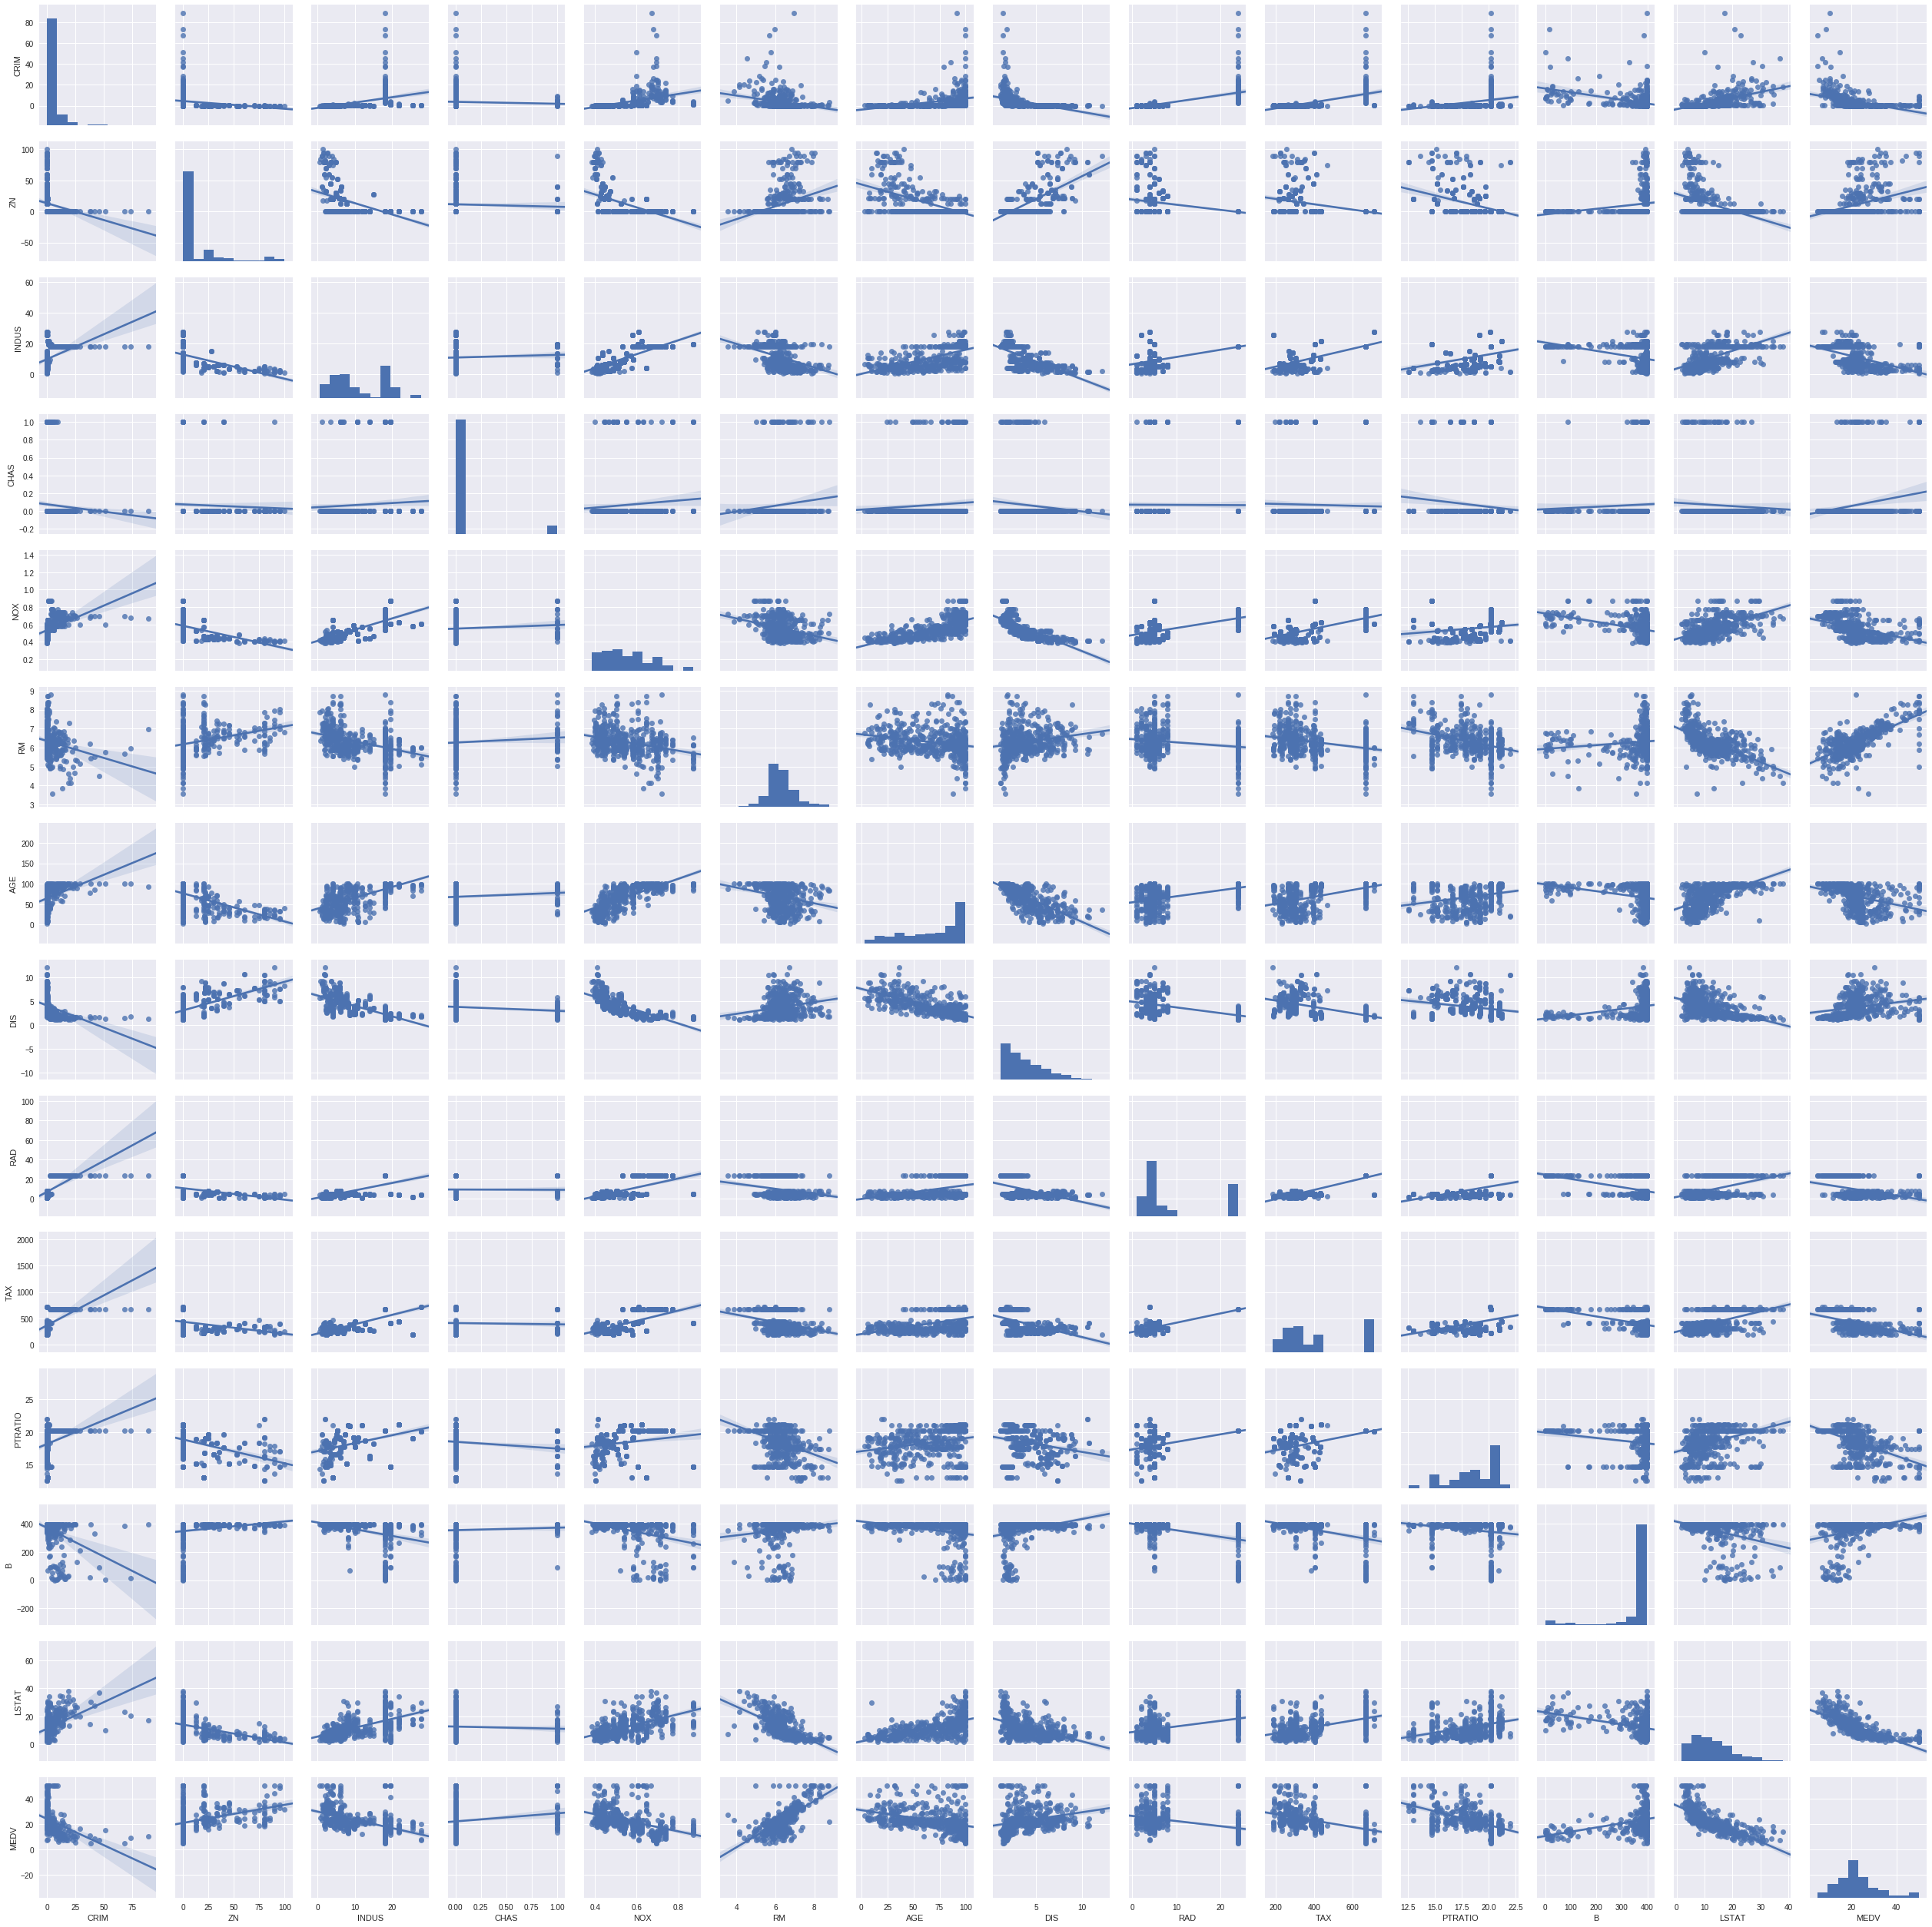

In [15]:
import time
start = time.time()
sns.pairplot(housing, kind='reg')
print(time.time() - start)

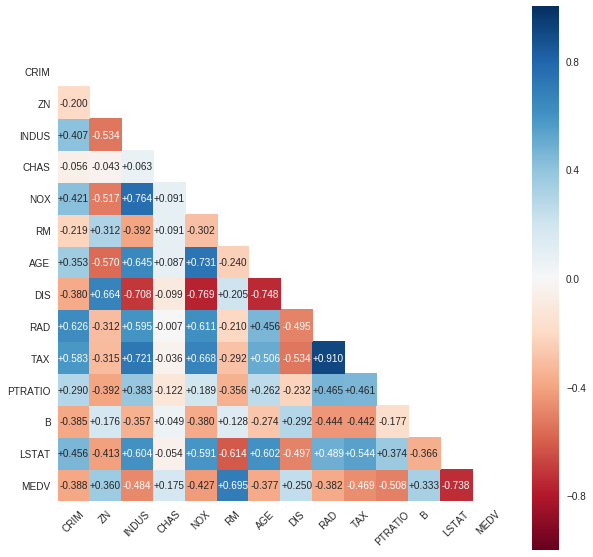

In [23]:
corr = housing.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 0)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')